<img src="https://docs.google.com/uc?export=download&id=1EiHSYfHYk8nKMEWd6A74CMFVak5Lf4ab">
# Supervised Learning: Support Vector Machines & Naive Bayes Classifier

>[Supervised Learning: Support Vector Machines & Naive Bayes Classifier](#scrollTo=b9q-VxEW5tRs)

>[1- Support Vector Machines](#scrollTo=1oBho425Q7ca)

>>[Principle](#scrollTo=yLvtrsm0RcWq)

>>[Example](#scrollTo=A8DvRRWlRdGi)

>>[Example (suite)](#scrollTo=OjzIaOe1RdZ2)

>[2- Kernel SVM Regressor](#scrollTo=VL49qQMiRCfC)

>>[Deep into SVM](#scrollTo=QtI6YjSJRzo8)

>>[Regression Example](#scrollTo=Tg2exEipRz7w)

>>[Regression Examples (suite)](#scrollTo=lYnbKQUdR0Ou)

>[3- Face recognition with SVM](#scrollTo=Nhm8OJc_RFU8)

>>[The Data](#scrollTo=TOgMnI_CR7QE)

>>[Visualizing the data](#scrollTo=iJCObGCDR7Wk)

>>[Training and Testing](#scrollTo=Zd06of0ZR7JC)

>[4-Naive Bayes Classification](#scrollTo=Ca8Ofrs7RHwC)

>>[Concept](#scrollTo=xn8bZSmqSBwY)

>>[Naive Bayes Classifier](#scrollTo=157T7zEfSB_u)

>>[Different Naive Bayes Classifiers](#scrollTo=ArfuFPFFSB4a)

>[5- Gaussian Naive Bayes](#scrollTo=5aXVjrUrRNGi)

>>[Guassian Distribution in scikitlearn](#scrollTo=H71qigLHSGU2)

>>[Data](#scrollTo=yMgLDZAdSGjG)

>>[Training and Testing](#scrollTo=Z7prBx0pSGbS)

>[6- Multinomial Naive Bayes](#scrollTo=CffbTqAERQKg)

>>[Multinomial Distribution in scikitlearn](#scrollTo=23ma5K3xSKrS)

>>[Data](#scrollTo=WIGdB_nfSK9o)

>>[Training and Testing](#scrollTo=_6H6Ca-GSK4-)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- Support Vector Machines

In [0]:
# installing mlxtend library, we will use its plting function for decsion boundaries
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 7.4MB/s 


## Principle

* The **support Vector Machine** classification (SVM) is a classification where the mathematical model is the** optimal hyperplane** that **delimits** the classes of the data.

* The **optimal hyperplane**, is the one that** maximizes**  the **distance** from each class.

* In a **binary classification** , with 2 features, the **hyperplane** is a** line** that **maximizes the distance** from the two classes.

* To** identify** the optimal line in this binary classification, a **margin **is drawn around** each separating line** up to the **nearest** point of each class.

* The optimal line, is the line that** maximizes** this **margin**.

## Example

* We will generate random data, and then we will apply an SVM classifier (with a linear regressor)

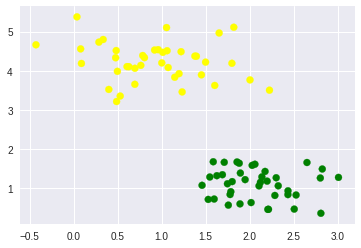

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF, Series as S
from sklearn.datasets.samples_generator import make_blobs
# generating random data with 2 classes, standard deviation = 0.55, and random seed ==0
x, y = make_blobs(n_samples=80, centers=2, random_state=0,cluster_std=[0.55,0.4])
# class 0 points are yellow, class 1 points are green
yc= ["green" if i else "yellow" for i in y]
plt.scatter(x[:, 0], x[:, 1],c=yc);

## Example (suite)

Predicted classes are:
 [1 0 0]


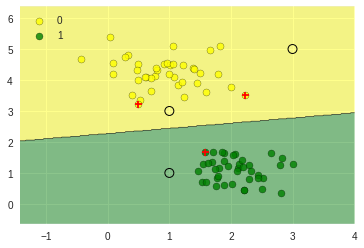

In [0]:
# importing support vector 
from sklearn.svm import SVC
# creating an instance of an SVC classifier
myModel =SVC(kernel='linear')
# fiting the model to the data
myModel.fit(x,y)
# the optimal calculated support vectors
vectXY=myModel.support_vectors_

# make prediction about some values
toPred=np.array([[1,1],[1,3],[3,5]])
yPred= myModel.predict(toPred)
print("Predicted classes are:\n",yPred)
# plotting the results
## plotting the decisions (classes ) regions with the boundary line 
## also hilighting the points with predicted classes
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=x,y=y,clf=myModel, legend=2,colors="yellow,green",
                      markers="oo",X_highlight=toPred)
## plot the suport vector  values
plt.scatter(vectXY[:,0],vectXY[:,1],marker="+",c="red")


#2- Kernel SVM Regressor

## Deep into SVM
* In this section, we will look at the "regression model" used in the previous classification, and how the boundary line (with the margin) is calculated.

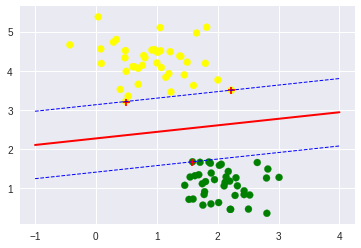

In [0]:
# the parameters of the regressor
a = myModel.coef_[0]
b = myModel.intercept_[0]
# In general, the linear regressor model is as follow
# y = a1*x1 + a2 *x2 + b
# y represents the distances from the boundary line
# at the boudary line: y == 0 
# => a1*x1+a2*x2+b=0 ==> a line's equation
# => x2 = (-a1*x1 - b)/ a2 = -a1/a2 * x1 - b/a2
# we will draw the boundary by initialing x1 values,
# and applying the previous formula, to calculate the 
# x2 corresponding values defining the line
x1 = np.linspace(-1,4,1000)
x2=  (- a[0]* x1-b)/a[1]
plt.scatter(x[:, 0], x[:, 1],c=yc);
plt.plot(x1,x2, "r-", linewidth=2)
# plot the suport vector (the red "+" markers)
plt.scatter(vectXY[:,0],vectXY[:,1],marker="+",c="red")
# plot the margin lines
# the margin lines are paralles to the boundary line
# and their distance from the boundary line |y|== 1
# for the upper line: y==1, for the lower one: y == -1
#upper line equation: ==>a1*x1+a2*x2+b=1 ==> x2==( 1-b-a1*x1)/a2
# lower line equation==>  a1*x1+a2*x2+b=-1 ==>x2==( -1-b-a1*x1)/a2
# we will apply the previous formulas, to calculate the 
# xmar1 and xmar2 corresponding values defining the margin lines
x2mar1 =  (1- a[0]* x1-b)/a[1]
x2mar2 =  (-1- a[0]* x1-b)/a[1] 
plt.plot(x1,x2mar1, "b--", linewidth=1)
plt.plot(x1,x2mar2, "b--", linewidth=1)


## Regression Example
* In this example, we will not use the **SVM** for classification, but instead, we will use it as a **regression** method to predict **house prices**
* First, we will load samples using **sklearn.dataset** module

In [0]:
# sklearn.datasets utilities doload data samples 
# and to use data generators
from sklearn import datasets
# import a support vector machine regressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# shuffle wil
from sklearn.utils import shuffle

#load the data
myData = datasets.load_boston()
# the data is a dictionnary where : the x eatures values are designated by "data" key
# the y labels values are designated by "target" key
myData

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

## Regression Examples (suite)

* In this example  we will:
* extract the **features** and the** labels ** values

  *   **spliting** the data into training and testing sets
  *  ** training **the model
  *  **evaluating** the model with the **test set**



In [0]:
x = myData.data
y = myData.target
# spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
# instantiate a svr with a linear regressor
myModel2 = SVR(kernel='linear')
# training phase
myModel2.fit(x_train, y_train)
# testting the model
yPred = myModel2.predict(x_test)
# Evaluating the model

print( "mean squared error :",mean_squared_error(y_test,yPred))


mean squared error : 31.402118369240412


In [0]:
# visualize the x values as a dataframe 
xDF = DF(x,columns=myData.feature_names)
xDF.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


# 3- Face recognition with SVM

## The Data
* We will use the dataset of labeled faces availabel at : [Labled Faces in the Wild] (http://vis-www.cs.umass.edu/lfw/)

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10)

print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

(2914,)
(62, 47)
21
(158,)
Catherine Zeta-Jones
images[0,0,0]== 95.333336  data[0,0]== 95.333336


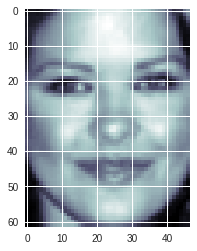

In [0]:
# look closer to the images
plt.imshow(faces.images[16],cmap='bone')
print(faces.data[16].shape)
print(faces.images[16].shape)
print(faces.target[16])
print(faces.target_names.shape)
print(faces.target_names[faces.target[16]])
print("images[0,0,0]==",faces.images[0,0,0]," data[0,0]==", faces.data[0,0])

## Visualizing the data

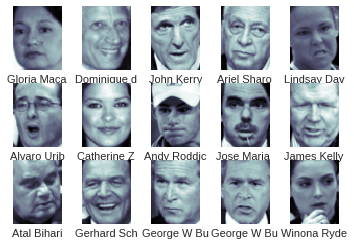

In [0]:
# ploting some images
import matplotlib.image as mpimg
fig, ax = plt.subplots(3, 5)
for i, axi in zip(range(10,25),ax.flat):
  axi.imshow(faces.images[i],cmap="bone")
  axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]][:11])

In [0]:
#  using Radial Basis Function (RBF) kernel 
myModel3 = SVC(kernel='linear')
# spliting the data
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,test_size=0.2)
# fiting to the data
myModel3.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Training and Testing

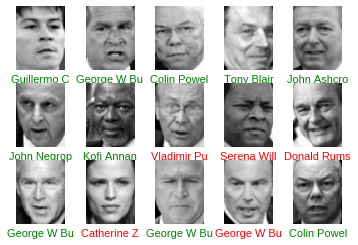

In [0]:
# predicting the values
yPred = myModel3.predict(x_test)
# defining the colors for correct and incorrect labels
cY = ["green" if j == i else "red" for i,j in zip(y_test,yPred)]
# ploting some test samples
fig, ax = plt.subplots(3, 5)
for i, axi in zip(range(88,103), ax.flat):
  axi.imshow(x_test[i].reshape(62, 47), cmap='gist_gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(faces.target_names[yPred[i]][:11],color=cY[i])
  

In [0]:
from sklearn.metrics import classification_report
# the classification report
print(classification_report(y_test, yPred,target_names=faces.target_names))

                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.25      0.40         4
             Adrien Brody       0.67      0.50      0.57         4
         Alejandro Toledo       0.40      0.44      0.42         9
             Alvaro Uribe       0.56      0.62      0.59         8
          Amelie Mauresmo       1.00      0.29      0.44         7
             Andre Agassi       0.22      0.33      0.27         6
             Andy Roddick       1.00      0.33      0.50         3
           Angelina Jolie       0.20      0.25      0.22         4
              Ann Veneman       0.67      1.00      0.80         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       1.00      1.00      1.00         1
             Ariel Sharon       0.42      0.57      0.48        14
    Arnold Schwarzenegger       0.21      0.30      0.25        10
     Atal Bihari Vajpayee       0.50      0.60      0.55     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 4-Naive Bayes Classification

## Concept
* Naive Bayes models, are a group a of classification algorithms
suitable for high dimensional  datasets.

* They can handle multiple classes directly.

* The Naive Bayes classification methods rely  on Bayes’s theorem (Bayesian classification).

* In  Bayesian classification, we try to determine the probability of  a label knowing the features values.  We note: 
P(L|Features)

* P( L|features )   is defined by as follow:  $P(Features|L)= \frac{P(features|L)* P(L)}{P(Features)} $

* To decide between 2 labels, we calculate the ratio: 
$\frac {P(Features|L_1)}{P(Features|L_2)}= \frac{P(features|L_1)* P(L_1)}{P(features|L_2)* P(L_2)} $

## Naive Bayes Classifier

* So, we have to use a model capable of computing the: (features|L)  

* This kind of models is called: generative model: it is able to generate data for each label.

* We have to define a generative model for each label.

* It is difficult to define a “general” model ==> so we make assumptions about the model ==> we define a “rough approximation”  of the general model.

* Because of this simplification, we call such classifier: “Naive Bayes
Classifier”


## Different Naive Bayes Classifiers

* **Gaussian Naive Bayes**
  * The assumption ==   the data for each label follows a “simple Guassian Distribution”

  * ==>  the model is simply defined by the mean  and the standard deviation of the samples of each label

* **Multinomial Naive Bayes**
  * The assumption ==   the data for each label follows a “simple
Multinomial  Distribution”

  * ==>  the model is simply defined by the probability  of observing counts, among a number of categories

# 5- Gaussian Naive Bayes

## Guassian Distribution in scikitlearn

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

with: $\sigma$ being the "standard deviation", and $ \mu$ the "mean".
Both of these two values are estimated using maximul likelihood estimation.

## Data 
* The descritpion of the data is in the data itself. From that, we deduc, that there are  ** 150** samples,  described by **4** features, and belonging to **3** classes.

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print(iris.DESCR)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

## Training and Testing



In [0]:
from sklearn.model_selection import train_test_split

#import the gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB
myModel4 = GaussianNB()
# spliting the data
x_train, x_test, y_train, y_test =train_test_split(iris.data, iris.target,test_size=0.2)
# training the model
myModel4.fit(x_train, y_train)

# testing the model
yPred= myModel4.predict(x_test)

from sklearn.metrics import classification_report

# print the classification report
print (classification_report(y_test,yPred,target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.89      0.94         9

avg / total       0.97      0.97      0.97        30



# 6- Multinomial Naive Bayes

## Multinomial Distribution in scikitlearn

* Used in text classification, where the data is represented as vectors of words count.

* It is parametrized by vectors:
$\theta_y = (\theta_{y1},\ldots,\theta_{yn}) $ for each class $y$. $n$ is the number of features (size of the vocabulary in  a text classification). 
* $\theta_i$ is $P(x_i|y)$ == the probability that the feature $i$ appears in a sample belonging to class $y$.

* $ \hat{\theta}_{yi} $ is computed as follow:


$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$
>$N_{yi} = \sum_{x \in T} x_i$: number times that the feature $i$ appears in a sample belonging to class $y$  in the training set T.

>$N_{y} = \sum_{i=1}^{n} N_{yi}$: is the total count for all features appearing in class $y$

* $\alpha \ge 0$: a moothing parameter, allows to avoid 0 probability.


## Data

* We will use another ready to use data from  **sklearn.datasets **

In [0]:
from sklearn.datasets import fetch_20newsgroups_vectorized

myTextD = fetch_20newsgroups_vectorized()
myTextD.target_names

myTextD

{'data': <11314x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 1787565 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 14, 12, 11]),
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']}

In [0]:
print(myTextD.data.shape)

(11314, 130107)


In [0]:
print(myTextD.data[5])

  (0, 3411)	0.024521886354905213
  (0, 8268)	0.024521886354905213
  (0, 12392)	0.024521886354905213
  (0, 25399)	0.024521886354905213
  (0, 25482)	0.024521886354905213
  (0, 25483)	0.024521886354905213
  (0, 25591)	0.024521886354905213
  (0, 25919)	0.049043772709810425
  (0, 25936)	0.024521886354905213
  (0, 26605)	0.024521886354905213
  (0, 27436)	0.049043772709810425
  (0, 27714)	0.024521886354905213
  (0, 28012)	0.024521886354905213
  (0, 28078)	0.049043772709810425
  (0, 28146)	0.07356565906471563
  (0, 28421)	0.024521886354905213
  (0, 28476)	0.024521886354905213
  (0, 28601)	0.024521886354905213
  (0, 28615)	0.024521886354905213
  (0, 29241)	0.09808754541962085
  (0, 29620)	0.07356565906471563
  (0, 29899)	0.024521886354905213
  (0, 29915)	0.024521886354905213
  (0, 30044)	0.024521886354905213
  (0, 32311)	0.1961750908392417
  :	:
  (0, 116722)	0.024521886354905213
  (0, 118831)	0.024521886354905213
  (0, 118983)	0.024521886354905213
  (0, 119977)	0.024521886354905213
  (0, 12007

## Training and Testing

In [0]:
#import the multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB
myModel5 = MultinomialNB()
# spliting the data
# spliting the data
x_train, x_test, y_train, y_test =train_test_split(myTextD.data, myTextD.target,test_size=0.2)
# training the model
myModel5.fit(x_train, y_train)

# testing the model
yPred= myModel5.predict(x_test)

from sklearn.metrics import classification_report

# print the classification report
print (classification_report(y_test,yPred,target_names=myTextD.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.40      0.55       101
           comp.graphics       0.85      0.54      0.66       127
 comp.os.ms-windows.misc       0.80      0.74      0.77       117
comp.sys.ibm.pc.hardware       0.58      0.81      0.68       113
   comp.sys.mac.hardware       0.95      0.55      0.70       137
          comp.windows.x       0.87      0.81      0.84       113
            misc.forsale       0.90      0.62      0.74       128
               rec.autos       0.71      0.89      0.79       118
         rec.motorcycles       0.66      0.92      0.77       105
      rec.sport.baseball       0.95      0.83      0.88       128
        rec.sport.hockey       0.81      0.96      0.88        99
               sci.crypt       0.45      0.97      0.62       112
         sci.electronics       0.89      0.56      0.69       128
                 sci.med       0.72      0.88      0.79       110
         

# References

* Aurélien Géron. Hands-on machine learning with Scikit-Learn and Tensor-Flow: concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc, 2017.

* Joshi Prateek. Artificial intelligence with Python. Packt Publishing, 2017.

* Scikit-learn.org. scikit-learn, machine learning in python.
scikit-learn.org/stable/. Accessed on 03-11-2018. On-line at https://scikit-learn.org/stable/.Accessed on 03-11-2018.

* Jake VanderPlas. Python data science handbook: essential tools for working with data. O’Reilly Media, Inc, 2017.

* Harry Zhang. The optimality of naive bayes. American Association for Artificial Intelligence, 1(2):3, 2004.